#Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студентки гр. 2384 Соц Екатерина Андреевна и Лавренова Юлия Дмитриевна. Вариант №17.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
1. Аналоговый сигнал:

$$x(t) = \sum_{k=1}^{11} A_kcos(\omega_kt + \phi_k)$$, где

$A_k$ - амплитуды гармоник, представляющие целые числа со значениями от 1 до 11, сгенерированные случайным образом

$\omega_k$ - частоты гармоник, изменяющиеся с шагом $0.1\pi$ от 0 до $\pi$

$\phi_k$ - начальные фазы, предстваляющие собой случайные числа в промежутке от 0 до 0.5

2. Формула ДПФ

$$X(n) = \sum_{k=0}^{N-1} x_k e^{-ik\frac{2\pi n}{N}}$$

, где $N$ - число отсчетов, $n = 0,1,2,..., N-1$

3. Передаточная функия нерекурсивных фильтров:
$H(\omega) = h_0 + 2 \sum_{k=1}^{m} h_k cos(k\omega)$

Для линейного сглаживания $h_k = \frac{1}{2m+1}$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$
 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(\omega_kt+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).
2. Визуализировать исходные аналоговый и дискретизированный сигналы.
3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для  $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.
5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.
6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.
7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.
8. Повторить п. 4–7 для следующих фильтров:
* Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
* Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

**1.** Формирование дискретного сигнала

Для формирования дискретного сигнала необходимо сначала сформировать аналоговый сигнал вида:

$$x(t) = \sum_{k=1}^{11} A_kcos(\omega_kt + \phi_k)$$, где

$A_k$ - амплитуды гармоник, представляющие целые числа со значениями от 1 до 11, сгенерированные случайным образом

$\omega_k$ - частоты гармоник, изменяющиеся с шагом $0.1\pi$ от 0 до $\pi$

$\phi_k$ - начальные фазе, предстваляющие собой случайные числа в промежутке от 0 до 0.5

Дискретный сигнал формируется путем дискретизации аналогового сигнала с шагом T=1. Всего отсчетов N=32:

$$x(n) = \sum_{k=1}^{11} A_kcos(\omega_kn + \phi_k), n=0, ..., N-1$$

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#частоты гармоник
w = [0]
w_k = 0
while w_k < math.pi:
  w_k += 0.1*math.pi
  w.append(w_k)

np.random.seed(42)
#амплитуды гармоник
amplitudes_gen = np.random.randint(1, 12, size=11)
sum_amp = sum(amplitudes_gen)
amplitudes = [a/sum_amp for a in amplitudes_gen]

#фазы гармоник
phi_k = np.random.uniform(0, 0.5, size=11)

#шаг дискретизации
T = 1
N = 32
t_x = np.arange(N) * T
t = np.linspace(0,31,1000)

signal_analog = np.zeros_like(t)
for i in range(11):
  signal_analog += amplitudes[i] * np.cos(w[i] * t + phi_k[i])

digital_signal = np.zeros(N)
for i in range(N):
  idx = np.argmin(np.abs(t - t_x[i]))
  digital_signal[i] = signal_analog[idx]


**2.** Визуализация аналогового и дискретного сигнала

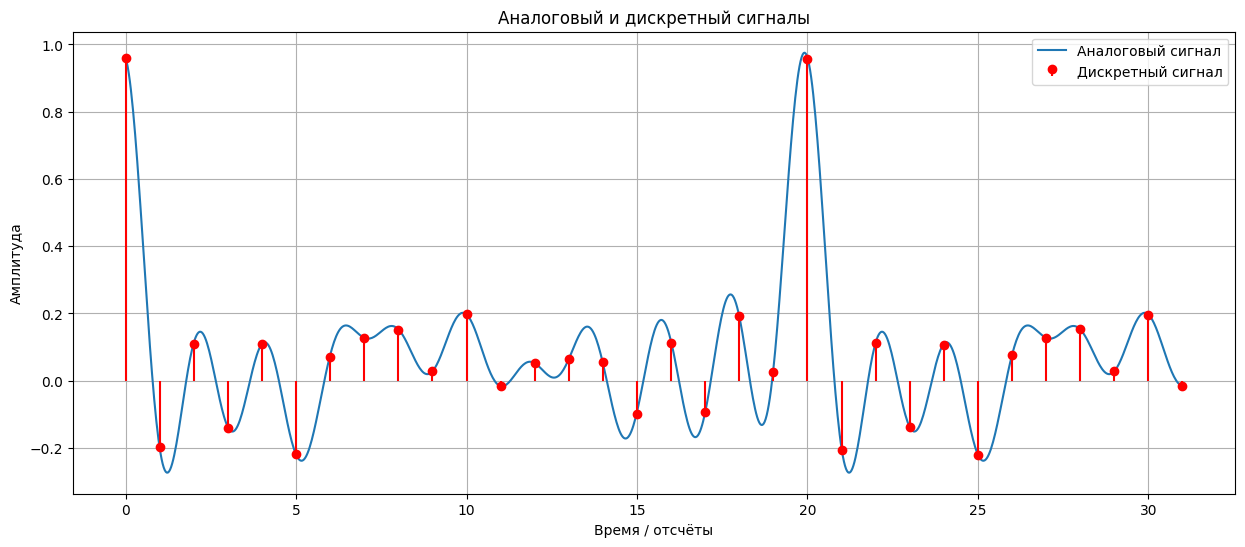

In [ ]:
plt.figure(figsize=(15, 6))

# Аналоговый сигнал
plt.plot(t, signal_analog, label='Аналоговый сигнал')

# Дискретный сигнал
plt.stem(t_x, digital_signal,
         linefmt='r-', markerfmt='ro', basefmt=' ',
         label='Дискретный сигнал')

plt.xlabel('Время / отсчёты')
plt.ylabel('Амплитуда')
plt.title('Аналоговый и дискретный сигналы')
plt.grid(True)
plt.legend()
plt.show()



**3.** Применение ДПФ для нахождения дискретных отсчетов спектра дискретного сигнала

Для нахождения дискретного спектра дискретного сигнала используется формула ДПФ

$$X(n) = \sum_{k=0}^{N-1} x_k e^{-ik\frac{2\pi n}{N}}$$

, где $N$ - число отсчетов, $n = 0,1,2,..., N-1$

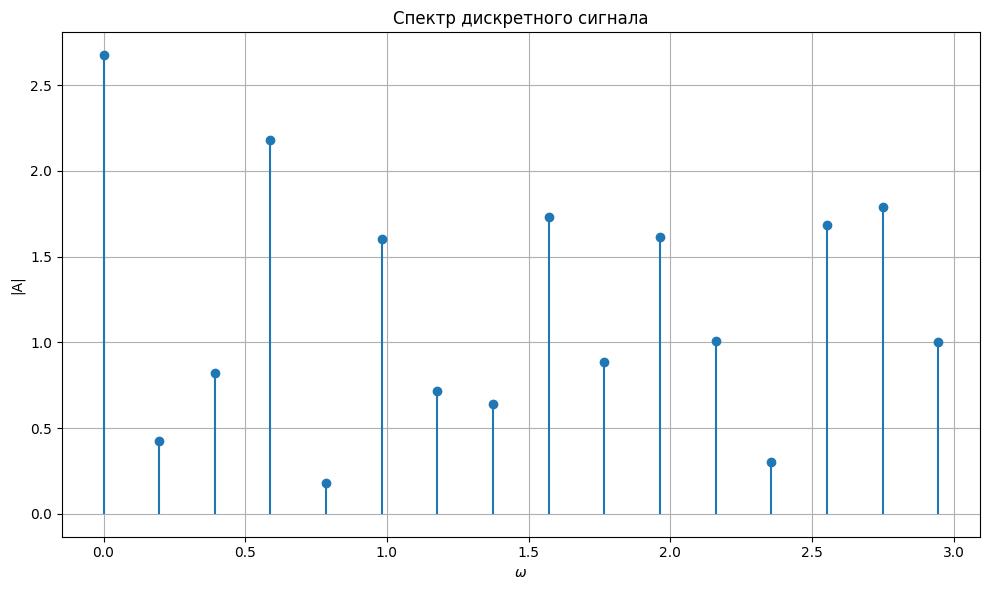

In [ ]:
#функция вычисления ДПФ
def dft(x):
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2*np.pi * k * n / N)
    return X

spectrum = dft(digital_signal)[:N//2]
omega = 2 * np.pi * np.arange(N) / N

plt.figure(figsize=(10,6))
plt.stem(omega[:N//2], np.abs(spectrum), basefmt=' ')
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала')
plt.grid(True)
plt.tight_layout()
plt.show()


Так как ДПФ обладает свойством симметрии, можно рассмотреть
только одну половину, удвоив амплитуду для положительных частот, чтобы
учесть энергетику обеих половин спектра.

На графике видны выраженные пики на частотах, соответствующих гармоникам исходного аналогового сигнала. То есть спектр правильно отображает частотный состав сигнала, ДПФ выполнено корректно и визуализация соответствует задаче.

**4.** Применение линейного сглаживания по 5-ти и 9-ти точкам

Формула линейного сглаживания для $2m+1$ точек

$$y_n = \frac{1}{2m+1} \sum_{k=n-m}^{k=n+m}s_k$$

Для 5 и 9 точек соответственно формула следующая:

$$y5_n = \frac{1}{5} \sum_{k=n-2}^{k=n+2}s_k$$

$$y9_n = \frac{1}{9} \sum_{k=n-4}^{k=n+4}s_k$$

Получим формулу передаточной функции $H(\omega)$ для данного фильтра:

Так как $s_n = e^{i\omega n}$:

$$y5_n = \frac{1}{5}(s_{n-2}+s_{n-1}+s_n+s_{n+1}+s{n+2}) = \frac{1}{5}(e^{(n-2)i\omega}+e^{(n-1)i\omega}+e^{ni\omega}+e^{(n+1)i\omega}+e^{(n+2)i\omega}) = \frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})e^{ni\omega}= H(\omega)*e^{ni\omega}$$

$$H(\omega) = \frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})= \frac{1}{5}(cos(2\omega)-isin(2\omega)+cos(\omega)-isin(\omega)+1+cos(\omega)+isin(\omega)+cos(2\omega)+isin(2\omega)) = \frac{1}{5}(1+2cos(\omega)+2cos(2\omega))
$$

Аналогично для 9-ти точек:

$$H(\omega) = \frac{1}{9}(e^{-4i\omega}+e^{-3i\omega}+e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega}+e^{3i\omega}+e^{4i\omega}) = \frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))
$$

In [ ]:
#функция вычисления линеного сглаживания
def liner_filter(n, x):
  y = np.zeros_like(x)
  half_window_size = (n - 1) // 2

  for i in range(len(x)):
      s = 0
      cnt = 0
      for k in range(-half_window_size, half_window_size + 1):
          idx = i + k
          if 0 <= idx < len(x):
              s += x[idx]
              cnt += 1
      y[i] = s / cnt
  return y

digital_signal_5 = liner_filter(5, digital_signal)
digital_signal_9 = liner_filter(9, digital_signal)


**5.** Визуализация

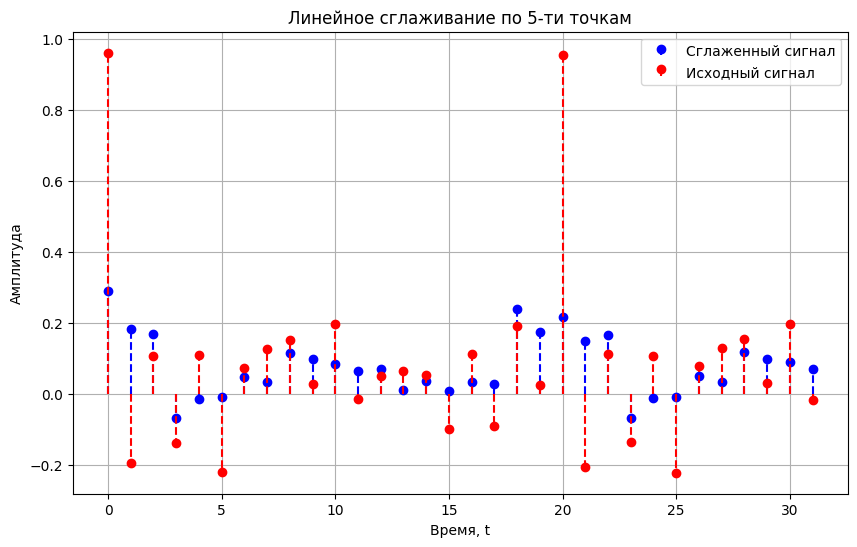

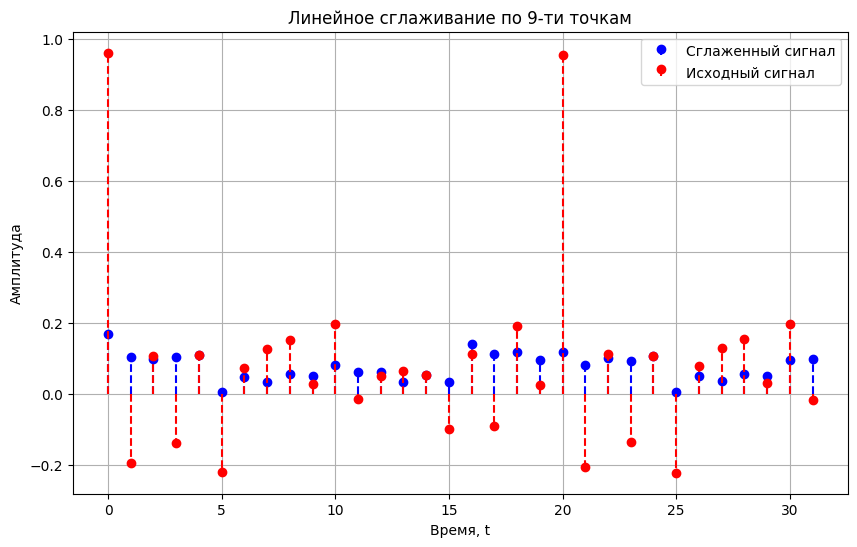

In [ ]:
#функция отрисовки сглаживания
def plot_smoothing(t, signal, title):
  plt.figure(figsize=(10,6))
  # График сигнала
  plt.stem(t, signal, 'bo--', basefmt=' ', label='Сглаженный сигнал')
  plt.stem(t, digital_signal, 'ro--', basefmt=' ', label='Исходный сигнал')
  plt.xlabel('Время, t')
  plt.ylabel('Амплитуда')
  plt.title(title)
  plt.grid(True)
  plt.legend()


plot_smoothing(t_x, digital_signal_5, "Линейное сглаживание по 5-ти точкам")
plot_smoothing(t_x, digital_signal_9, "Линейное сглаживание по 9-ти точкам")

**6.** ДПФ для линейно сглаженного дискретного сигнала

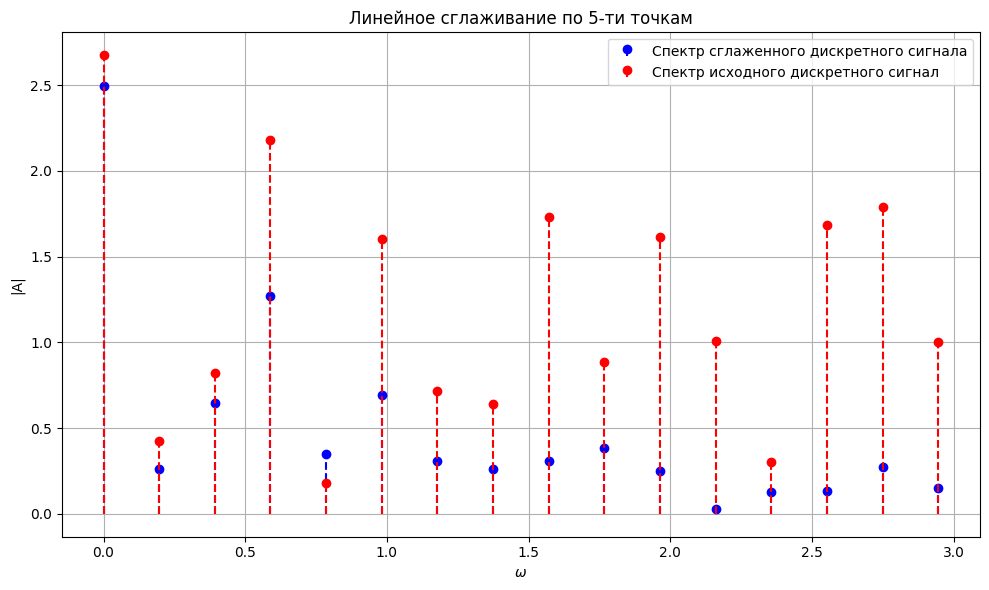

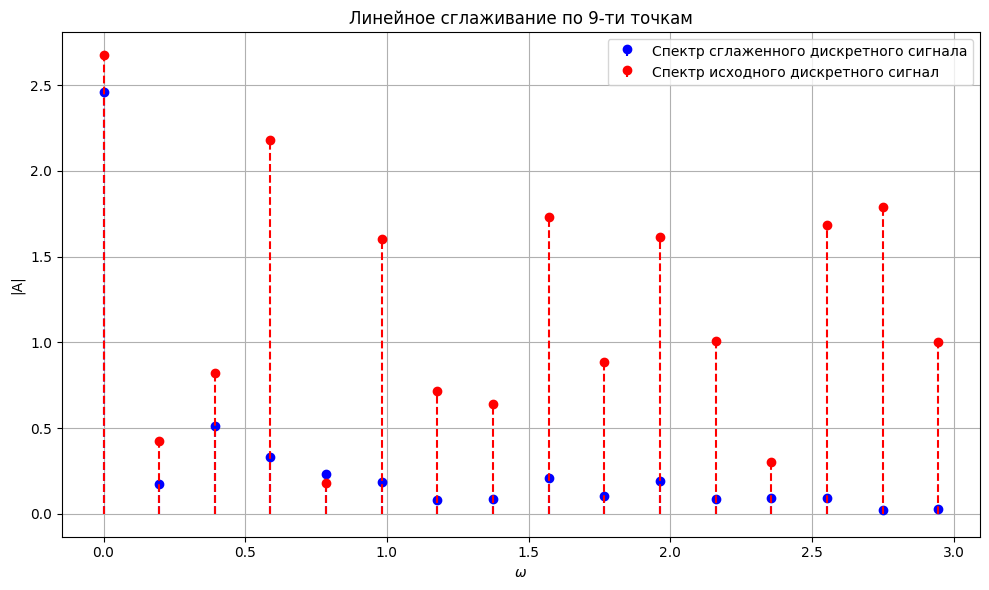

In [ ]:
#функция отрисовки спектра
def plot_spectrum(smooth_spectrum, title):
  plt.figure(figsize=(10,6))
  # График сигнала
  omega = 2 * np.pi * np.arange(N) / N
  plt.stem(omega[:N//2], abs(smooth_spectrum), 'bo--', basefmt=' ', label='Спектр сглаженного дискретного сигнала')
  plt.stem(omega[:N//2], abs(spectrum), 'ro--', basefmt=' ', label='Спектр исходного дискретного сигнал')
  plt.xlabel('$\\omega$')
  plt.ylabel('|A|')
  plt.title(title)
  plt.legend()

  plt.grid(True)
  plt.tight_layout()


dpf_liner5 = dft(digital_signal_5)[:N//2]
dpf_liner9 = dft(digital_signal_9)[:N//2]

plot_spectrum(dpf_liner5, "Линейное сглаживание по 5-ти точкам")
plot_spectrum(dpf_liner9, "Линейное сглаживание по 9-ти точкам")


Применяя функции сглаживания, амплитуда дискретного сигнала значительно уменьшается, причем подавление увеличивается с увеличением числа точек, используемых в фильтрации.

При построении спектров исходного дискретного сигнала и дискретных сигналов с применением фильтрации видно, что с увеличением частоты, также увеличивается и подавление амплитуды, с увеличением числа точек в фильтре, подавление сильнее и наступает на меньших частотах.

**7.** Анализ результатов со значениями $H(\omega)$

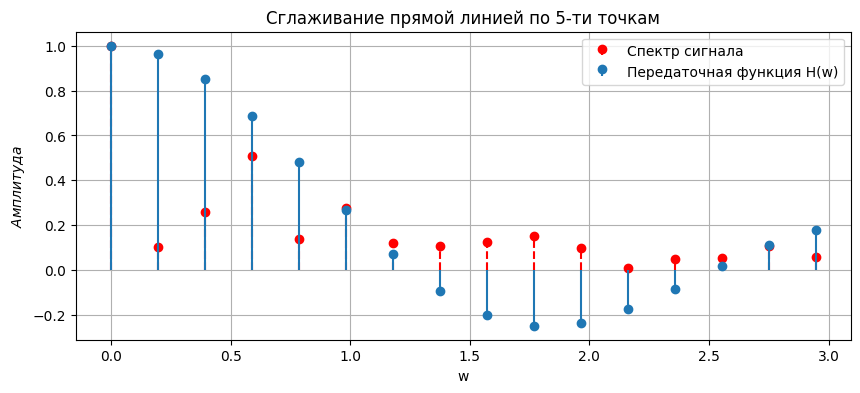

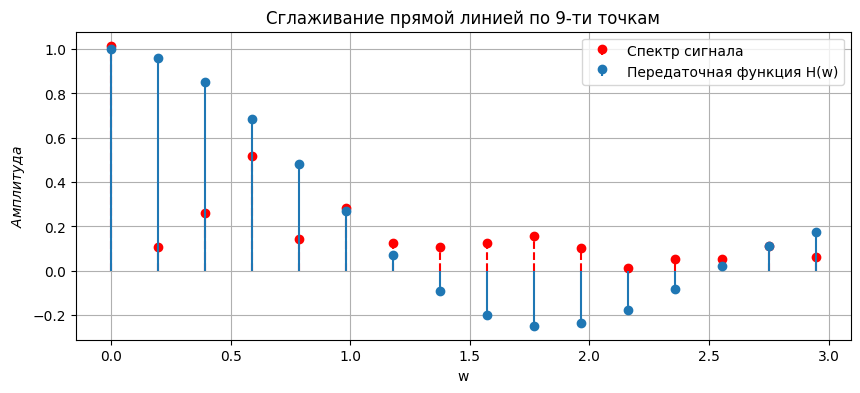

In [ ]:
h_lin = {}
n_points = [5, 9]

omega = 2 * np.pi * np.arange(N) / N

def H_avg(w, n):
    K = (n - 1) // 2
    H = 1 + 2 * np.sum([np.cos(w * k) for k in range(1, K + 1)], axis=0)
    return H / n

for n in n_points:
    h_lin[n] = H_avg(omega[:N//2], n)

# График
plt.figure(figsize=(10, 4))
plt.stem(omega[:N//2], np.abs(dpf_liner5)/max(np.abs(dpf_liner5)), 'r--', basefmt=' ', label='Спектр сигнала')
plt.stem(omega[:N//2], h_lin[5], basefmt=' ', label='Передаточная функция H(w)')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание прямой линией по 5-ти точкам')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(omega[:N//2], np.abs(dpf_liner5)/max(np.abs(dpf_liner9)), 'r--', basefmt=' ', label='Спектр сигнала')
plt.stem(omega[:N//2], h_lin[5], basefmt=' ', label='Передаточная функция H(w)')

plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание прямой линией по 9-ти точкам')
plt.legend()
plt.grid(True)
plt.show()

В результате сравнения графиков аналитической передаточной функции линейного фильтра и спектра дискретного сигнала, полученного с помощью ДПФ, видно, что их частотные зависимости практически совпадают. Это подтверждает, что вычисленный спектр корректно отражает частотные свойства фильтра и соответствует теоретической передаточной функции.

**8.** **Численное дифференцирование первого порядка**


Формула численного дифференцирования 1-ого порядка:

$$y_n = \frac{y_{n+1} - y_{n-1}}{2h}, h = T$$

Формула передаточной функции $H(\omega)$ для данного фильтра:

Так как $s_n = e^{i\omega n}$:

$$y_n = \frac{y_{n+1} - y_{n-1}}{2h} = \frac{e^{i\omega (n+1)} - e^{i\omega (n-1)}}{2h} = \frac{e^{i\omega} - e^{-i\omega}}{2h}*e^{ni\omega} = H(\omega)*e^{ni\omega}$$

$$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2h} = \frac{cos(\omega) + isin(\omega) - (cos(\omega) - isin(\omega))}{2h} = \frac{2isin(\omega)}{2h} =  \frac{isin(\omega)}{h}
$$

Так как T = 1, получаем:

$$y_n = \frac{y_{n+1} - y_{n-1}}{2}$$

$$H(\omega) = isin(\omega)$$

In [ ]:
#функция численного дифференцирования
def numerical_differentiation(x):
  y = np.zeros_like(x)
  y[0] = x[0]
  for i in range(1,len(x)-1):
      y[i] = (x[i+1] - x[i-1])/2
  y[len(x)-1] = x[len(x)-1]
  return y

digital_signal_num_diff = numerical_differentiation(digital_signal)

Визуализация сглаженных дискретных сигналов с помощью численного дифференцирования 1-ого порядка

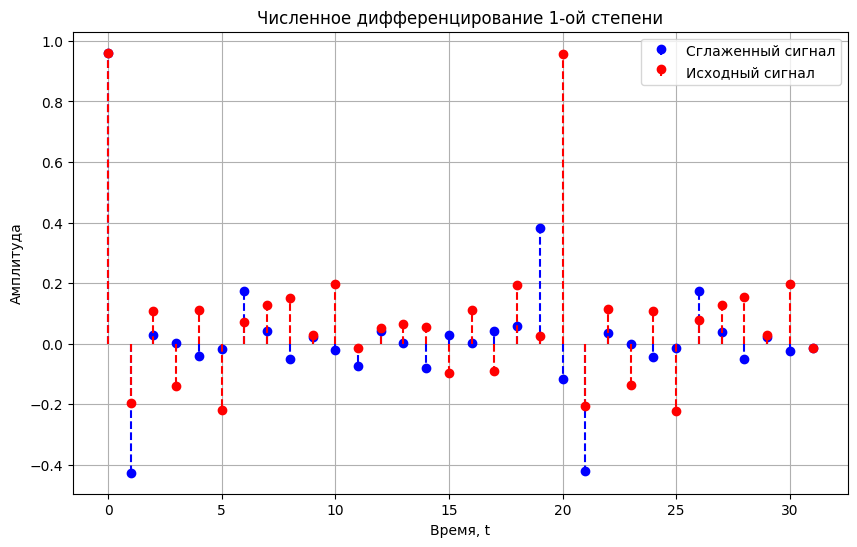

In [ ]:
plot_smoothing(t_x, digital_signal_num_diff, "Численное дифференцирование 1-ой степени")

После применения численного дифференцирования 1-го порядка дискретный сигнал отражает темпы изменения исходного сигнала.
На графике видно, что участки возрастания исходного сигнала соответствуют положительным значениям дифференцированного сигнала, а убывания - отрицательным.
Центральные точки дают точное численное приближение производной, тогда как граничные значения менее точны.

Визуализация спектров сглаженных дискретных сигналов с помощью численного дифференцирования 1-ого порядка

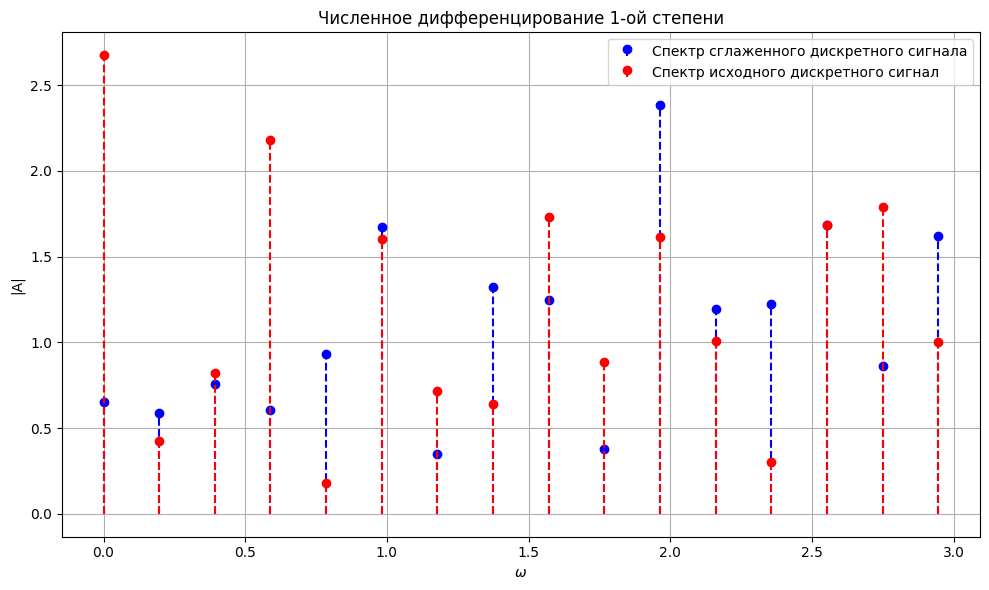

In [ ]:
dpf_num_diff = dft(digital_signal_num_diff)[:N//2]
plot_spectrum(dpf_num_diff, "Численное дифференцирование 1-ой степени")

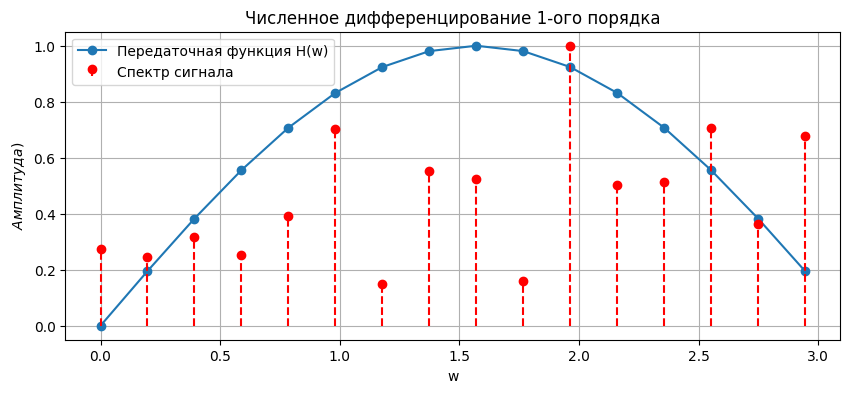

In [ ]:
omega = 2 * np.pi * np.arange(N) / N
h_num_diff = -1j*np.sin(omega[:N//2])

#построение графика
plt.figure(figsize=(10, 4))
plt.plot(omega[:N//2], abs(h_num_diff), marker='o', label=f'Передаточная функция H(w)')
plt.stem(omega[:N//2], abs(dpf_num_diff/max(dpf_num_diff)), 'ro--', basefmt=' ', label=f'Спектр сигнала')

plt.xlabel('w')
plt.ylabel('$Амплитуда)$')
plt.title('Численное дифференцирование 1-ого порядка')
plt.legend()
plt.grid(True)
plt.show()


Форма спектра соответствует теоретическому H(ω).

Численное дифференцирование корректно выделяет средние и высокие частоты.

Низкочастотные компоненты почти не усиливаются, что соответствует ожиданиям.*Курсив*

**9.** **Сглаживание формулой численного интегрирования**

Формула для сглаживания формулой трапеции:

$$
y_{n+1} = y_n + \frac{1}{2}(s_n+s_{n+1}), y_0 = 0
$$

Найдем формулу передаточной функции для данного фильтра:

Пусть $s_n = e^{i\omega n}$ и $y_n = H(\omega)e^{i\omega n}$

Тогда получим:

$$
y_{n+1} = H(\omega)e^{i\omega (n+1)}
$$

$$
y_{n+1} = H(\omega)e^{i\omega (n)} +  \frac{1}{2}(e^{i\omega(n)} + e^{i\omega(n+1)})
$$

Откуда, приравняв:

$$
H(\omega)e^{i\omega (n+1)} = H(\omega)e^{i\omega (n)} +  \frac{1}{2}(e^{i\omega(n)} + e^{i\omega(n+1)})
$$

$$
H(\omega)e^{i\omega (n+1)} - H(\omega)e^{i\omega (n)} = \frac{1}{2}(e^{i\omega(n)} + e^{i\omega(n+1)})
$$

$$
H(\omega)e^{i\omega (n)}(e^{i\omega} - 1) = \frac{1}{2}e^{i\omega(n)} ( 1 + e^{i\omega})
$$

$$
H(\omega)(e^{i\omega} - 1) = \frac{1}{2}(1 + e^{i\omega})
$$

$$
H(\omega) = \frac{1 + e^{i\omega}}{2(e^{i\omega} - 1)} = \frac{e^{i\omega\frac{1}{2}}e^{i\omega\frac{1}{2}} + e^{i\omega\frac{1}{2}}e^{i\omega-\frac{1}{2}}}{2(e^{i\omega\frac{1}{2}}e^{i\omega\frac{1}{2}} - e^{i\omega\frac{1}{2}}e^{i\omega-\frac{1}{2}})} =\frac{e^{i\omega\frac{1}{2}}+ e^{i\omega-\frac{1}{2}}}{e^{i\omega\frac{1}{2}}- e^{i\omega-\frac{1}{2}}} =\frac{cos(\frac{\omega}{2})}{2isin(\frac{\omega}{2})}
$$


In [ ]:
#функция вычисления сглаживания формулой трапеции
def trapeze_smooth(s):
  y = np.zeros_like(s)
  y[0] = 0
  for i in range(1,len(s)):
      y[i] = y[i-1] + 0.5*(s[i-1]+ s[i])
  return y

digital_signal_trapeze = trapeze_smooth(digital_signal)

Визуализация сглаженных дискретных сигналов формулой трапеции

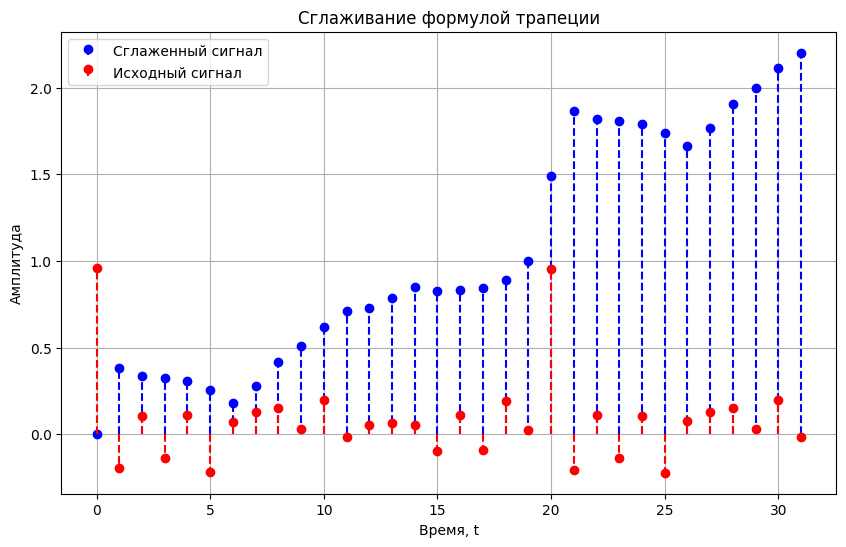

In [ ]:
plot_smoothing(t_x, digital_signal_trapeze, "Сглаживание формулой трапеции")

Визуализация спектров сглаженных дискретных сигналов формулой трапеции

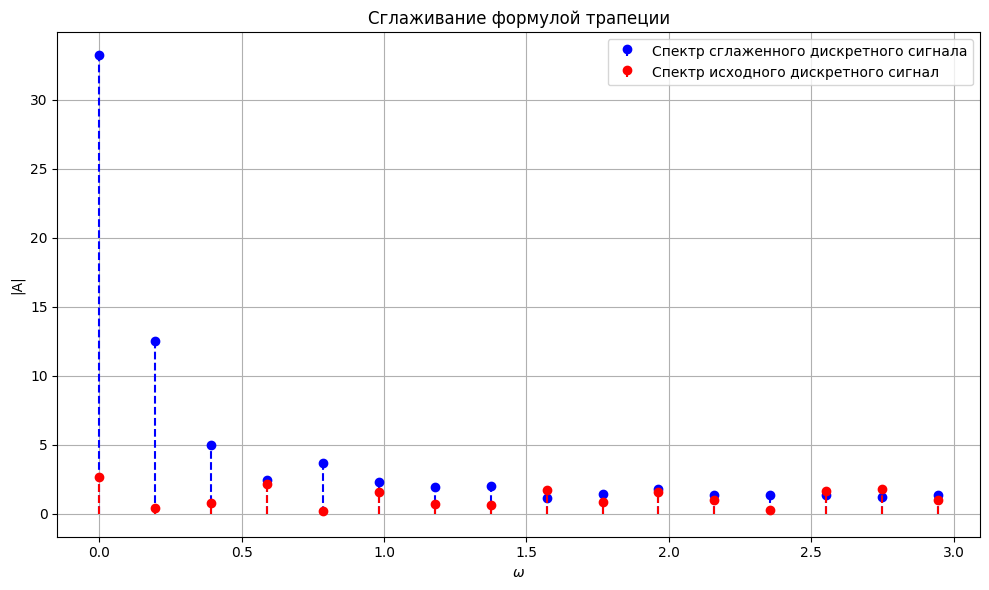

In [ ]:
dpf_trapeze = dft(digital_signal_trapeze)[:N//2]
plot_spectrum(dpf_trapeze, "Сглаживание формулой трапеции")

Применяя формулу трапеции для сглаживания, амплитуда дискретного сигнала также уменьшается, однако присутствуют и одиночные всплески.

При построении спектров исходного дискретного сигнала и дискретных сигналов с применением данной фильтрации видно, что сигнал сильно подавлен, амплитуда сглаженного сигнала сильно меньше исходного на всех частотах.

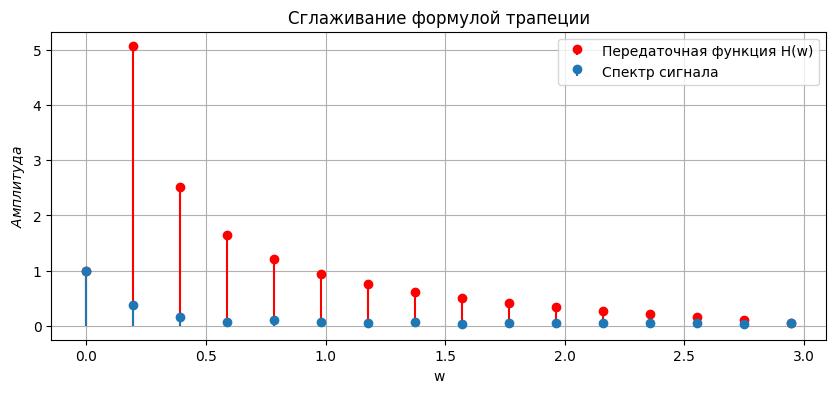

In [ ]:
#функция вычисления
def H_trapeze(w):
    H = np.zeros_like(w, dtype=complex)
    nonzero = w != 0
    H[nonzero] = np.cos(w[nonzero]/2) / (2j * np.sin(w[nonzero]/2))
    H[~nonzero] = 1.0  # предел при w=0
    return H


omega = 2 * np.pi * np.arange(N) / N

#Вычисление функции
h_trapeze = H_trapeze(omega[:N//2])

#построение графика
plt.figure(figsize=(10, 4))
plt.stem(omega[:N//2], abs(h_trapeze), 'ro', basefmt=' ', label='Передаточная функция H(w)')
plt.stem(omega[:N//2], abs(dpf_trapeze/max(dpf_trapeze)), basefmt=' ', label='Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание формулой трапеции')
plt.legend()
plt.grid(True)
plt.show()


Форма спектра соответствует теоретическому H(ω). Амплитуда спектра сильнее подавлена, нежели амплитуда передаточной функции. Таким образом, видно, что их частотные зависимости хорошо совпадают. Следовательно, вычисленный спектр корректно отражает частотные свойства фильтра и соответствует теоретической передаточной функции.

**Фомула для сглаживания формулой прямоугольников**
$$
y_{n+1} = y_n + s_{n+\frac{1}{2}}, y_0 = 0
$$

Найдем формулу передаточной функции для данного фильтра:

Пусть $s_n = e^{i\omega n}$ и $y_n = H(\omega)e^{i\omega n}$

Тогда получим:

$$
y_{n+1} = H(\omega)e^{i\omega (n+1)}
$$

$$
y_{n+1} = H(\omega)e^{i\omega (n)} +  e^{i\omega (n+\frac{1}{2})}
$$

Откуда, приравняв:

$$
H(\omega)e^{i\omega (n+1)} = H(\omega)e^{i\omega (n)} +  e^{i\omega (n+\frac{1}{2})}
$$

$$
H(\omega)e^{i\omega (n+1)} - H(\omega)e^{i\omega (n)} = e^{i\omega (n+\frac{1}{2})}
$$

$$
H(\omega)(e^{i\omega (n+1)} - e^{i\omega (n)}) = e^{i\omega (n+\frac{1}{2})}
$$

$$
H(\omega)e^{i\omega (n)}(e^{i\omega} - 1) = e^{i\omega (n)}e^{i\omega (\frac{1}{2})}
$$

$$
H(\omega)(e^{i\omega} - 1) = e^{i\omega (\frac{1}{2})}
$$

$$
H(\omega) = \frac{e^{i\omega \frac{1}{2}}}{e^{i\omega} - 1}=\frac{e^{i\omega \frac{1}{2}}}{e^{i\omega\frac{1}{2}}e^{i\omega\frac{1}{2}} - e^{i\omega\frac{1}{2}}e^{i\omega-\frac{1}{2}}} = \frac{1}{e^{i\omega\frac{1}{2}} - e^{i\omega-\frac{1}{2}}} = \frac{1}{cos(\frac{\omega}{2})+isin(\frac{\omega}{2}) - (cos(\frac{\omega}{2})-isin(\frac{\omega}{2}))} =\frac{1}{2isin(\frac{\omega}{2})}
$$

In [ ]:
def rectangle_smooth(s):
  y = np.zeros_like(s)
  y[0] = 0
  for i in range(1,len(s)):
      y[i] = y[i-1] + 0.5*(s[i-1]+ s[i])
  return y

digital_signal_rectangle = rectangle_smooth(digital_signal)

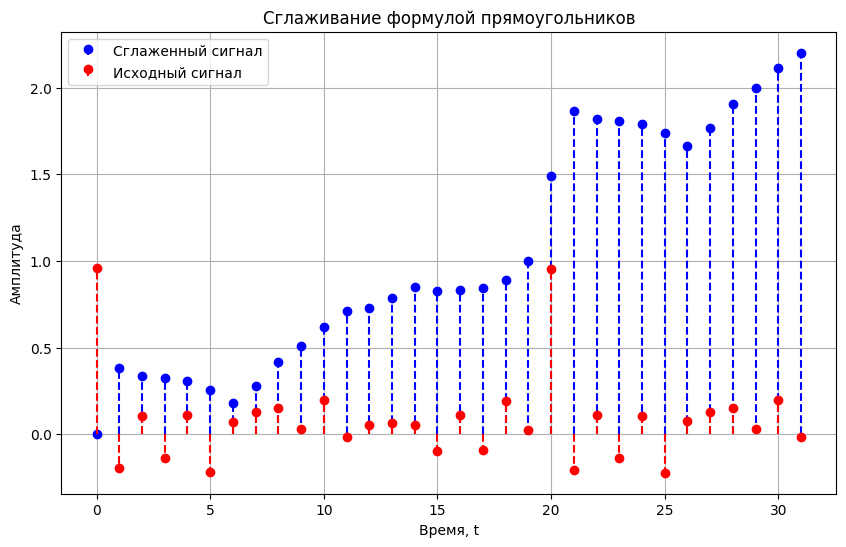

In [ ]:
plot_smoothing(t_x, digital_signal_rectangle, "Сглаживание формулой прямоугольников")

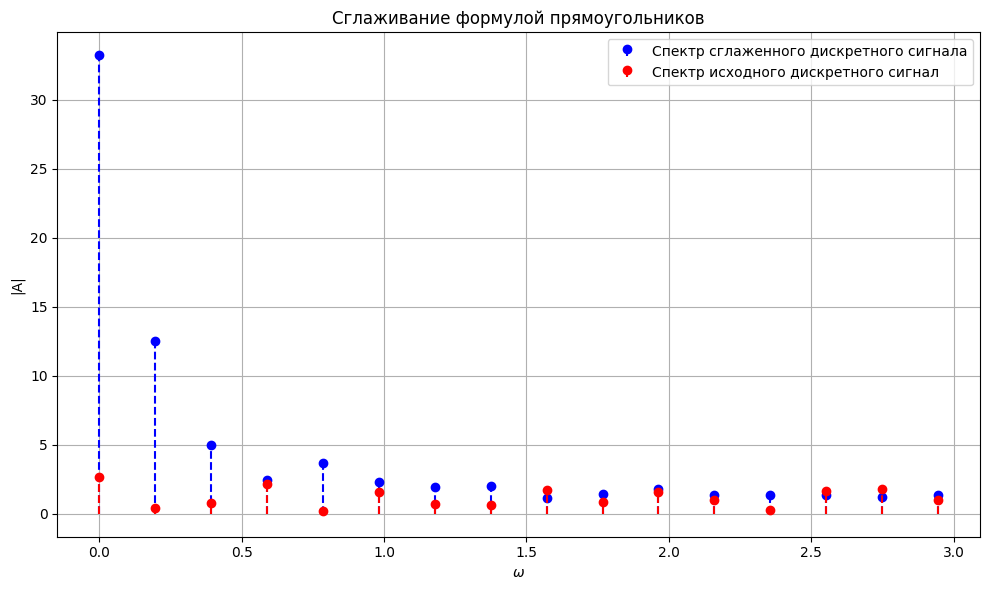

In [ ]:
dpf_rect = dft(digital_signal_rectangle)[:N//2]
plot_spectrum(dpf_rect, "Сглаживание формулой прямоугольников")

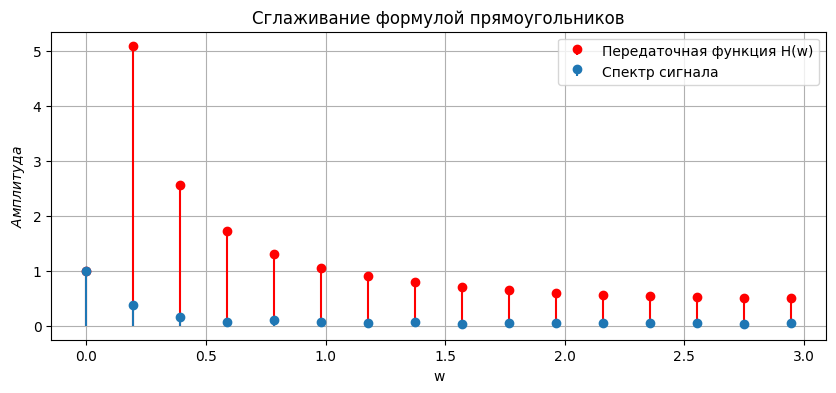

In [ ]:
#функция вычисления
def H_rect(w):
    H = np.zeros_like(w, dtype=complex)
    nonzero = w != 0
    H[nonzero] = 1 / (2j * np.sin(w[nonzero]/2))
    H[~nonzero] = 1.0  # предел при w=0
    return H


omega = 2 * np.pi * np.arange(N) / N

#Вычисление функции
h_rect = H_rect(omega[:N//2])

#построение графика
plt.figure(figsize=(10, 4))
plt.stem(omega[:N//2], abs(h_rect), 'ro', basefmt=' ', label='Передаточная функция H(w)')
plt.stem(omega[:N//2], abs(dpf_rect/max(dpf_rect)), basefmt=' ', label='Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание формулой прямоугольников')
plt.legend()
plt.grid(True)
plt.show()

Формула для сглаживания формулой Симпсона:

$$
y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1}), y_0 = 0
$$

Найдем формулу передаточной функции для данного фильтра

Пусть $s_n = e^{i\omega n}$ и $y_n = H(\omega)e^{i\omega n}$

Тогда получим:

$$
y_{n+1} = H(\omega)e^{i\omega (n+1)}
$$

$$
y_{n+1} = H(\omega)e^{i\omega (n-1)} +  \frac{1}{3}(e^{i\omega(n-1)}+4e^{i\omega(n)} + e^{i\omega(n+1)})
$$

Откуда, приравняв:

$$
H(\omega)e^{i\omega (n+1)} =H(\omega)e^{i\omega (n-1)} +  \frac{1}{3}(e^{i\omega(n-1)}+4e^{i\omega(n)} + e^{i\omega(n+1)})
$$

$$
H(\omega)e^{i\omega (n+1)} - H(\omega)e^{i\omega (n-1)} = \frac{1}{3}(e^{i\omega(n-1)}+4e^{i\omega(n)} + e^{i\omega(n+1)})
$$

$$
H(\omega)e^{i\omega (n)}(e^{i\omega} - e^{-i\omega}) = \frac{1}{3}e^{i\omega(n)} ( e^{-i\omega} +4 + e^{i\omega})
$$

$$
H(\omega)(e^{i\omega} - e^{-i\omega}) = \frac{(e^{-i\omega} +4 + e^{i\omega})}{3}
$$

$$
H(\omega) = \frac{( e^{-i\omega} +4 + e^{i\omega})}{3(e^{i\omega} - e^{-i\omega})} = \frac{cos(\omega) - isin(\omega)+ 4 + cos(\omega) + isin(\omega)}{3(cos(\omega) + isin(\omega)- (cos(\omega) - isin(\omega)))} = \frac{2cos(\omega)+ 4}{3(2isin(\omega))} = \frac{cos(\omega)+ 2}{3isin(\omega)}
$$

In [ ]:
def simpson_smooth(s):
  y = np.zeros_like(s)
  y[0] = 0
  for i in range(1,len(s)-1):
      y[i] = y[i-1] + (s[i-1] + 4*s[i] + s[i+1])/3
  y[len(s)-1] = s[len(s)-1]
  return y

digital_signal_simpson = simpson_smooth(digital_signal)

Визуализация сглаженных дискретных сигналов формулой Симпсона

In [ ]:
plot_smoothing(t_x, digital_signal_simpson, "Сглаживание формулой Симпсона")

Визуализация спектров сглаженных дискретных сигналов формулой Симпсона

In [ ]:
dpf_simpson = dft(digital_signal_simpson)[:N//2]
plot_spectrum(dpf_simpson, "Сглаживание формулой Симпсона")

Применяя формулу Симпсона для сглаживания, амплитуда дискретного сигнала также уменьшается, однако присутствуют и одиночные всплески.

При построении спектров исходного дискретного сигнала и дискретных сигналов с применением данной фильтрации видно, что сигнал сильно подавлен, амплитуда сглаженного сигнала сильно меньше исходного на всех частотах.

In [ ]:
#функция вычисления
def H_simpson(w):
    H = np.zeros_like(w, dtype=complex)
    nonzero = w != 0
    H[nonzero] = (np.cos(w[nonzero]) + 2) / (3j * np.sin(w[nonzero]))
    H[~nonzero] = 1.0  # значение для w=0
    return H

omega = 2 * np.pi * np.arange(N) / N

#Вычисление функции
h_simpson = H_simpson(omega[:N//2])

#построение графика
plt.figure(figsize=(10, 4))
plt.stem(omega[:N//2], abs(h_simpson), 'ro-', basefmt=' ', label='Передаточная функция H(w)')
plt.stem(omega[:N//2], abs(dpf_simpson/max(dpf_simpson)), basefmt=' ', label='Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание формулой Симпсона')
plt.legend()
plt.grid(True)
plt.show()


При сравнении передаточной функции данного фильтра со спектром дискретного сигнала, полученным с помощью ДПФ, видно, что их частотные зависимости хорошо совпадают, как и в предыдущих фильтрах. Следовательно, вычисленный спектр корректно отражает частотные свойства фильтра и соответствует теоретической передаточной функции.

**10.** Вывод по практической работе

В ходе работы исследовано применение рекурсивных фильтров для
реализации математических операций над дискретными сигналами.
Фильтр-дифференциатор (FIR типа 1-z^-1) работает как ФВЧ. Он
подчеркивает границы и перепады сигнала, но сильно усиливает
высокочастотный
шум.
Применим
для
выделения
контуров
или
детектирования изменений.
Фильтры-интеграторы (IIR) работают как ФНЧ с бесконечным
усилением на постоянном токе.
Метод прямоугольников – простейший накопитель.
Метод
трапеций
–
более
точный
аналог
интегрирования
(соответствует билинейному преобразованию), лучше подавляет высшие
частоты (нули на частоте Найквиста).
Метод Симпсона – фильтр более высокого порядка, обеспечивает
лучшую аппроксимацию интеграла для гладких функций, но требует
больше памяти и вычислений.
Выбор
методачисленной
Дифференцированиеиспользуется
фильтрации
для
зависит
от
задачи.
анализа изменений (спектр
сдвигается в ВЧ), интегрирование – для восстановления сигнала по
производной или сильного сглаживания (спектр сжимается в НЧ)